In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import os
import subprocess
import cv2 
from PIL import Image 

#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)
import OneD.FDM as FDM
import OneD.NBody as NB
import OneD.Global as GF



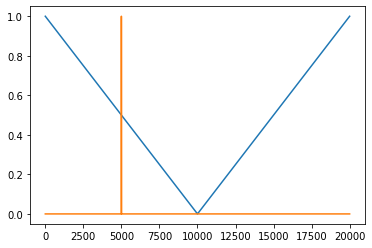

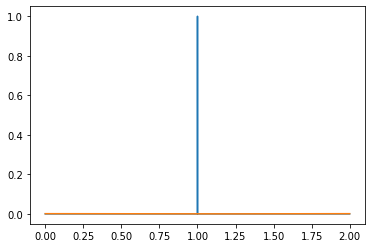

In [5]:
N=10**4
rho = np.zeros(N)
rho[N//2]+=1
#rho[N//2+100]+=1

L=2
x = np.linspace(0,L,N)
G = 0.5*x
G = np.append(G[::-1],G)
plt.plot(G)
plt.plot(np.append(rho,np.zeros_like(rho)))
plt.show()

G_tilde = np.fft.rfft(G)
phi = GF.fourier_potential(rho,L,type = 'Isolated', G_tilde = G_tilde)
plt.plot(x,rho)
plt.plot(x,phi)
plt.show()

499
499.0


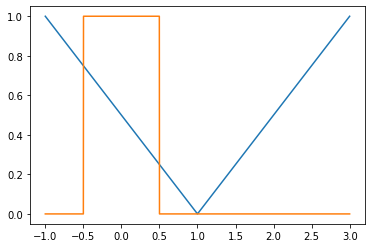

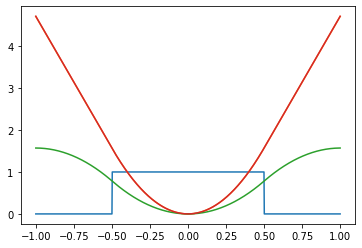

In [6]:
N=10**3
rho = np.zeros(N)
rho[N//2]+=1
Num = 1
for i in range(1,250):
    rho[N//2-i]+=1
    rho[N//2+i]+=1
    Num+=2
print(Num)
Num = np.sum(rho)
print(Num)
rho = rho#/Num #normalize

L=2
x = np.linspace(-L/2,L/2,N)
dx = x[1]-x[0]
x_long = np.linspace(-L,L,2*N)
G = np.abs(x_long)/2

x_long = np.linspace(-L/2,3*L/2,2*N)
plt.plot(x_long,G)
plt.plot(x_long,np.append(rho,np.zeros_like(rho)))
plt.show()

G_tilde = np.fft.rfft(G)
phi = GF.fourier_potential(rho,L,type = 'Isolated', G_tilde = G_tilde)
plt.plot(x,rho)
plt.plot(x,phi)
phi2 = GF.Periodic_Poisson(rho,L)
plt.plot(x,phi2)
#phi3 = GF.Isolated_Poisson(rho,dx,G_tilde)

#ANALYTIC SOLUTION
a = 0.5
#Domain(s) for analytic solution:
x_1 = np.linspace(-a,a,499)
x_2 = np.linspace(a,L/2,250)
x_3 = np.linspace(-L/2,-a,250)
x_full = np.append(x_3,np.append(x_1,x_2))
#Outputs on domains:
analytic_1 = 2*np.pi*(x_1)**2
analytic_2 = 2*np.pi*a*(2*x_2-a)
analytic_3 = -2*np.pi*a*(2*x_3+a)
analytic = np.append(analytic_3,np.append(analytic_1,analytic_2))
plt.plot(x_full,analytic)

plt.show()


Choose a (non-dimensional) box length:

Choose percentage (as a decimal) of FDM (by mass)
Fraction of Particles (by mass) = 1.0


How many particles?
Num_stars = 1
sigma = 1.0
Num_Bosons = 0.0
mu = 1


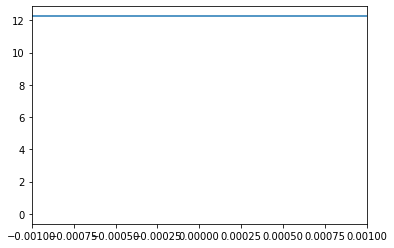

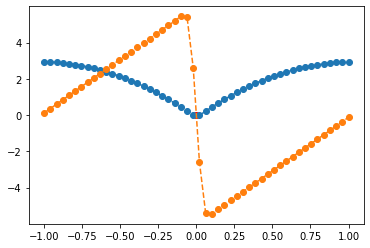

-2.6032983817750233
Star position = 0
Acceleration on star via my code:
1.4033219031261979e-13
Closest index position (div(z/dz)):
j=24
acceleration @ j = 2.6032983817750206
remainder = 0.020408163265305035
Accounting for remainder via interpolation:
a=1.4033219031261979e-13
Notice the added portion (for interpolation) is large:
rem*(a_grid[j+1]-a_grid[j])/dz=-2.6032983817748803


In [51]:
L_s = 1 #kpc
v_s = 1 #100km/s
G = 1
hbar = 1
T = L_s/v_s
M_s = L_s*v_s**2

L, mu, Num_bosons, r, lambda_deB, R, sigma, Num_stars = GF.StartupV2(hbar, L_s, v_s)
m = mu*M_s
percent_FDM = Num_bosons * mu / (Num_bosons * mu + Num_stars * sigma)

#Set up Grid
L = L*L_s #new length. Length of the box
N = 5*10**1 #number of grid points
z = np.linspace(-L/2,L/2,N)
dz = z[1]-z[0]

stars = [NB.star(0,sigma,0,0)]
grid_counts = NB.grid_count(stars,L,z)
rho_part = (grid_counts/dz)*sigma #this is actually like chi x chi*
plt.plot(z,rho_part)
plt.plot([z[N//2],z[N//2]],[0,rho_part[N//2]])
plt.plot([z[N//2+1],z[N//2+1]],[0,rho_part[N//2+1]])
plt.xlim(-0.001,0.001)
plt.show()
G = z/2
G = np.append(G[::-1],G)
G_tilde = np.fft.rfft(G)
#phi = GF.Isolated_Poisson(rho_part,L,G_tilde)
phi = GF.Periodic_Poisson(rho_part,L)

a_grid = -GF.gradient(phi,L,type='Isolated')

plt.plot(z,phi,"o--")
plt.plot(z,a_grid,"o--")
plt.scatter(stars[0].x,0,c="r")
#plt.plot(z,rho_part)
#plt.xlim(-0.001,0.001)
plt.show()

print(a_grid[25])
print("=========")

g=NB.accel_funct(a_grid,L,dz)
print(f"Star position = {stars[0].x}")
print("Acceleration on star via my code:")
print(g(stars[0].x))

j=int((stars[0].x+L/2)//dz)
print("Closest index position (div(z/dz)):")
print(f"j={j}")
print(f"acceleration @ j = {a_grid[j]}")

rem = (stars[0].x+L/2) % dz
print(f"remainder = {rem}") 
print("Accounting for remainder via interpolation:")
value = a_grid[j] + rem*(a_grid[j+1]-a_grid[j])/dz
print(f"a={value}")

print("Notice the added portion (for interpolation) is large:")
print(f"rem*(a_grid[j+1]-a_grid[j])/dz={rem*(a_grid[j+1]-a_grid[j])/dz}")
#g = NB.accel_funct(a_grid,L,dz)

1.2566370614400246 -1.2566370614400246


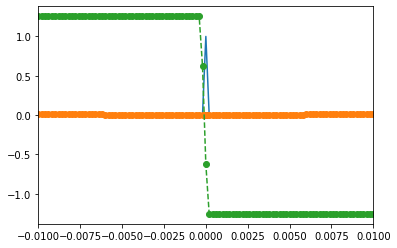

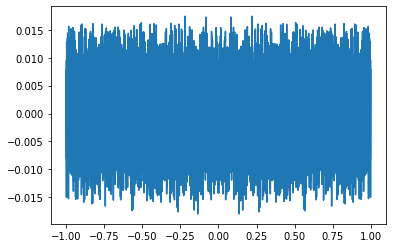

In [20]:
L_s = 1 #kpc
v_s = 1 #100km/s
G = 1
hbar = 1
T = L_s/v_s
M_s = L_s*v_s**2

L = 2
mu = 10**3
#L, mu, Num_bosons, r, lambda_deB, R, sigma, Num_stars = GF.StartupV2(hbar, L_s, v_s)
#m = mu*M_s
#percent_FDM = Num_bosons * mu / (Num_bosons * mu + Num_stars * sigma)

#Set up Grid
L = L*L_s #n01ew length. Length of the box
N = 10**4+1 #number of grid points
z = np.linspace(-L/2,L/2,N)
dz = z[1]-z[0]

chi = np.zeros_like(z)
chi[N//2] = 1

rho_FDM = mu*np.absolute(chi)**2 #just norm-squared of wavefunction
psi = chi* L**(-3/2)

# stars = [NB.star(0,sigma,0,0)]
# grid_counts = NB.grid_count(stars,L,z)
# rho_part = (grid_counts/dz)*sigma #this is actually like chi x chi*
    
G = z/2
G = np.append(G[::-1],G)
G_tilde = np.fft.rfft(G)
phi = GF.Isolated_Poisson(rho_FDM,L,G_tilde)

a_grid = -GF.gradient(phi,L,type='Isolated')
print(np.max(a_grid),np.min(a_grid))

plt.plot(z,chi)
plt.plot(z,phi,"o--")
plt.plot(z,a_grid,"o--")
plt.scatter(stars[0].x,0,c="r")
plt.xlim(-0.01,0.01)
plt.show()

dtau = 0.1
r=10
chi = FDM.kick(chi,phi/2,r,dtau/2)
chi = FDM.drift(chi,r/2,dz,dtau)
phi = GF.Isolated_Poisson(rho_FDM,L,G_tilde)
chi = FDM.kick(chi,phi/2,r,dtau/2)
plt.plot(z,chi)